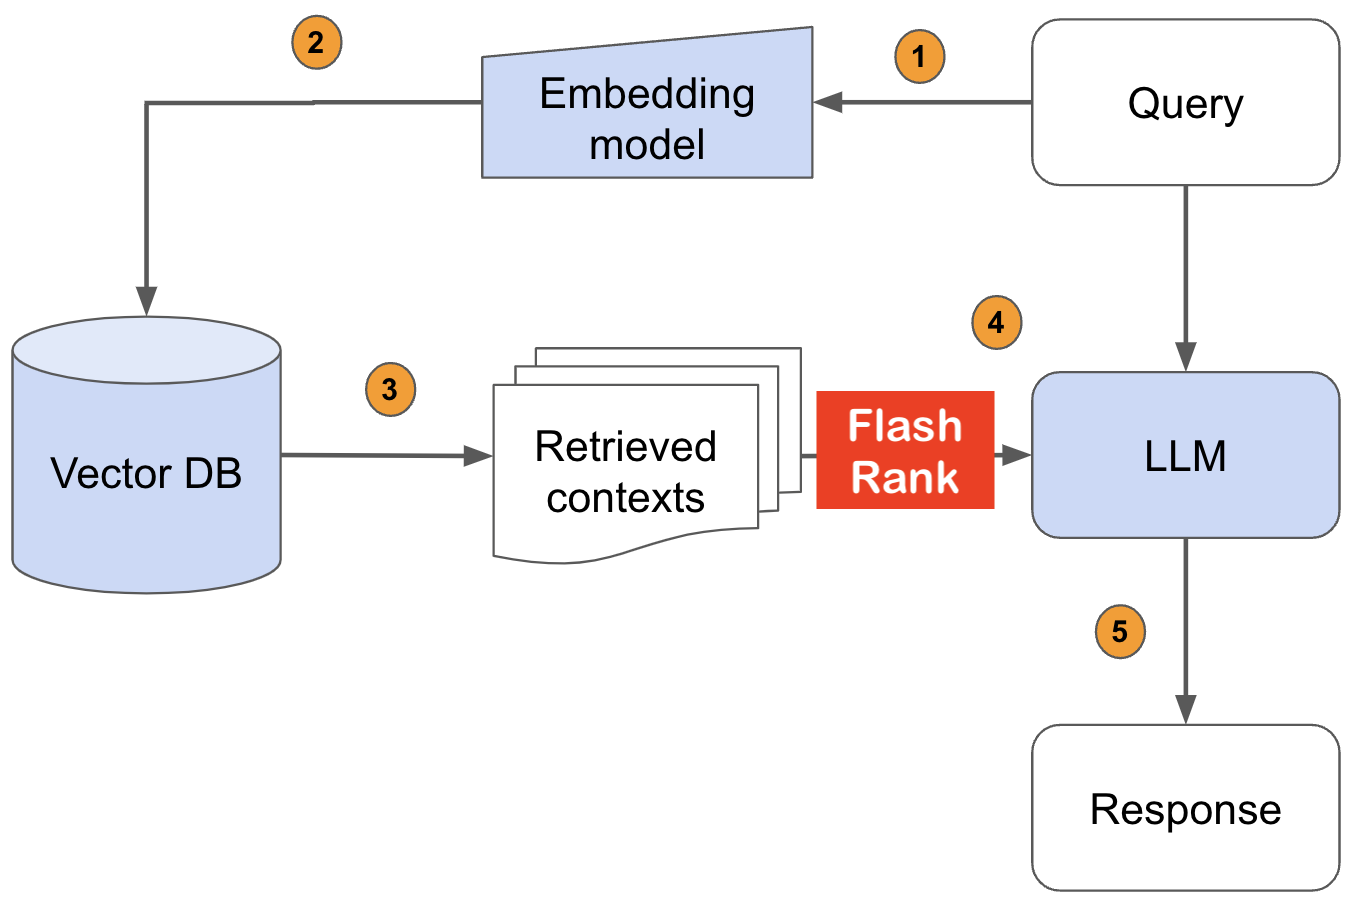

Initial Retrieval: A standard retriever model first retrieves a set of documents based on a user's query. 

Re-ranking: FlashRank then takes these retrieved documents and re-ranks them based on their relevance to the query, using techniques like cross-encoders or LLMs. 
Improved Relevance: The re-ranked documents are then prioritized, ensuring that the most relevant information is presented to the user. 

In [ ]:
# chain.invoke(query)
#     chain = RetrievalQA.from_chain_type(llm=llm, retriever=compression_retriever)
#         compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)
#             compressor = FlashrankRerank()
#             compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)
#             compressor = FlashrankRerank()
#             llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro",temperature=0)
#             retriever = FAISS.from_documents(texts, embedding).as_retriever(search_kwargs={"k": 10})
#             embedding =GoogleGenerativeAIEmbeddings(model="models/embedding-001")
            

In [1]:

# Helper function for printing docs


def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [
                f"Document {i+1}:\n\n{d.page_content}\nMetadata: {d.metadata}" for i, d in enumerate(docs)
            ]
        )
    )

In [2]:

query = "How to speedup LLMs?"

In [3]:
passages = [
   {
      "id":1,
      "text":"Introduce *lookahead decoding*: - a parallel decoding algo to accelerate LLM inference - w/o the need for a draft model or a data store - linearly decreases # decoding steps relative to log(FLOPs) used per decoding step.",
      "meta": {"additional": "info1"}
   },
   {
      "id":2,
      "text":"LLM inference efficiency will be one of the most crucial topics for both industry and academia, simply because the more efficient you are, the more $$$ you will save. vllm project is a must-read for this direction, and now they have just released the paper",
      "meta": {"additional": "info2"}
   },
   {
      "id":3,
      "text":"There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of these techniques can be used in combination with each other and there are plenty of others to try. - Bettertransformer (Optimum Library): Simply call `model.to_bettertransformer()` on your Hugging Face model for a modest improvement in tokens per second. - Fp4 Mixed-Precision (Bitsandbytes): Requires minimal configuration and dramatically reduces the model's memory footprint. - AutoGPTQ: Time-consuming but leads to a much smaller model and faster inference. The quantization is a one-time cost that pays off in the long run.",
      "meta": {"additional": "info3"}

   },
   {
      "id":4,
      "text":"Ever want to make your LLM inference go brrrrr but got stuck at implementing speculative decoding and finding the suitable draft model? No more pain! Thrilled to unveil Medusa, a simple framework that removes the annoying draft model while getting 2x speedup.",
      "meta": {"additional": "info4"}
   },
   {
      "id":5,
      "text":"vLLM is a fast and easy-to-use library for LLM inference and serving. vLLM is fast with: State-of-the-art serving throughput Efficient management of attention key and value memory with PagedAttention Continuous batching of incoming requests Optimized CUDA kernels",
      "meta": {"additional": "info5"}
   }
]

In [4]:

from flashrank.Ranker import Ranker, RerankRequest

In [5]:

def get_result(query,passages,choice):
    if choice == "Nano":
        ranker = Ranker()
    elif choice == "Small":
        ranker = Ranker(model_name="ms-marco-MiniLM-L-12-v2", cache_dir="/opt")
    elif choice == "Medium":
        ranker = Ranker(model_name="rank-T5-flan", cache_dir="/opt")
    elif choice == "Large":
        ranker = Ranker(model_name="ms-marco-MultiBERT-L-12", cache_dir="/opt")

    rerankrequest = RerankRequest(query=query, passages=passages) # pass the query and  redtrival results to the rerank request
    
    results = ranker.rerank(rerankrequest)
    print(results)

    return results

In [7]:
%%time
get_result(query,passages,"Nano")

INFO:flashrank.Ranker:Downloading ms-marco-TinyBERT-L-2-v2...
ms-marco-TinyBERT-L-2-v2.zip: 100%|██████████| 3.26M/3.26M [00:00<00:00, 11.0MiB/s]


[{'id': 4, 'text': 'Ever want to make your LLM inference go brrrrr but got stuck at implementing speculative decoding and finding the suitable draft model? No more pain! Thrilled to unveil Medusa, a simple framework that removes the annoying draft model while getting 2x speedup.', 'meta': {'additional': 'info4'}, 'score': 0.018163264}, {'id': 5, 'text': 'vLLM is a fast and easy-to-use library for LLM inference and serving. vLLM is fast with: State-of-the-art serving throughput Efficient management of attention key and value memory with PagedAttention Continuous batching of incoming requests Optimized CUDA kernels', 'meta': {'additional': 'info5'}, 'score': 0.013987866}, {'id': 3, 'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of 

[{'id': 4,
  'text': 'Ever want to make your LLM inference go brrrrr but got stuck at implementing speculative decoding and finding the suitable draft model? No more pain! Thrilled to unveil Medusa, a simple framework that removes the annoying draft model while getting 2x speedup.',
  'meta': {'additional': 'info4'},
  'score': 0.018163264},
 {'id': 5,
  'text': 'vLLM is a fast and easy-to-use library for LLM inference and serving. vLLM is fast with: State-of-the-art serving throughput Efficient management of attention key and value memory with PagedAttention Continuous batching of incoming requests Optimized CUDA kernels',
  'meta': {'additional': 'info5'},
  'score': 0.013987866},
 {'id': 3,
  'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exha

In [ ]:
%%time
get_result(query,passages,"Small")

INFO:flashrank.Ranker:Downloading ms-marco-MiniLM-L-12-v2...
ms-marco-MiniLM-L-12-v2.zip: 100%|██████████| 21.6M/21.6M [00:02<00:00, 10.5MiB/s]


[{'id': 4, 'text': 'Ever want to make your LLM inference go brrrrr but got stuck at implementing speculative decoding and finding the suitable draft model? No more pain! Thrilled to unveil Medusa, a simple framework that removes the annoying draft model while getting 2x speedup.', 'meta': {'additional': 'info4'}, 'score': 0.9439003}, {'id': 3, 'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of these techniques can be used in combination with each other and there are plenty of others to try. - Bettertransformer (Optimum Library): Simply call `model.to_bettertransformer()` on your Hugging Face model for a modest improvement in tokens per second. - Fp4 Mixed-Precision (Bitsandbytes): Requires minimal configuration and dramatically re

[{'id': 4,
  'text': 'Ever want to make your LLM inference go brrrrr but got stuck at implementing speculative decoding and finding the suitable draft model? No more pain! Thrilled to unveil Medusa, a simple framework that removes the annoying draft model while getting 2x speedup.',
  'meta': {'additional': 'info4'},
  'score': 0.9439003},
 {'id': 3,
  'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of these techniques can be used in combination with each other and there are plenty of others to try. - Bettertransformer (Optimum Library): Simply call `model.to_bettertransformer()` on your Hugging Face model for a modest improvement in tokens per second. - Fp4 Mixed-Precision (Bitsandbytes): Requires minimal configuration and dramat

In [9]:
%%time
get_result(query,passages,"Medium")

INFO:flashrank.Ranker:Downloading rank-T5-flan...
rank-T5-flan.zip: 100%|██████████| 73.7M/73.7M [00:07<00:00, 10.8MiB/s]


[{'id': 3, 'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of these techniques can be used in combination with each other and there are plenty of others to try. - Bettertransformer (Optimum Library): Simply call `model.to_bettertransformer()` on your Hugging Face model for a modest improvement in tokens per second. - Fp4 Mixed-Precision (Bitsandbytes): Requires minimal configuration and dramatically reduces the model's memory footprint. - AutoGPTQ: Time-consuming but leads to a much smaller model and faster inference. The quantization is a one-time cost that pays off in the long run.", 'meta': {'additional': 'info3'}, 'score': 0.52268475}, {'id': 4, 'text': 'Ever want to make your LLM inference go brrrrr but got stuck at implement

[{'id': 3,
  'text': "There are many ways to increase LLM inference throughput (tokens/second) and decrease memory footprint, sometimes at the same time. Here are a few methods I’ve found effective when working with Llama 2. These methods are all well-integrated with Hugging Face. This list is far from exhaustive; some of these techniques can be used in combination with each other and there are plenty of others to try. - Bettertransformer (Optimum Library): Simply call `model.to_bettertransformer()` on your Hugging Face model for a modest improvement in tokens per second. - Fp4 Mixed-Precision (Bitsandbytes): Requires minimal configuration and dramatically reduces the model's memory footprint. - AutoGPTQ: Time-consuming but leads to a much smaller model and faster inference. The quantization is a one-time cost that pays off in the long run.",
  'meta': {'additional': 'info3'},
  'score': 0.52268475},
 {'id': 4,
  'text': 'Ever want to make your LLM inference go brrrrr but got stuck at 

In [18]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [20]:

from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_community.vectorstores import FAISS

In [12]:

documents = TextLoader("data/fusion.txt").load()

In [13]:

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)

In [14]:

texts = text_splitter.split_documents(documents)

In [15]:

for id, text in enumerate(texts):
    text.metadata["id"] = id

In [16]:
texts

[Document(metadata={'source': 'data/fusion.txt', 'id': 0}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\nproud to say that they were perfectly normal, thank\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\nhold with such nonsense.\nMr. Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin'),
 Document(metadata={'source': 'data/fusion.txt', 'id': 1}, page_content='and blonde and had nearly twice the usual amount of neck, which\ncame in very useful as she spent so much of her time craning over\ngarden fences, spying on the neighbors.  e Dursleys had a small\nson called Dudley and in their opinion there was no fi ner boy\nanywhere.\n e Dursleys had everything they wanted, but they also had a\nsecret, and their greatest fear was that somebody would disco

In [25]:

embedding =GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [26]:

retriever = FAISS.from_documents(texts, embedding).as_retriever(search_kwargs={"k": 10})

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Successfully loaded faiss with AVX2 support.


In [30]:

query = "Where did Mr. Dursley always use to sit  ?"

In [31]:
docs = retriever.invoke(query)

In [32]:
docs

[Document(id='3d921b1f-22a7-40a3-8104-53dc5e79a86d', metadata={'source': 'data/fusion.txt', 'id': 9}, page_content='than he was, and wearing an emerald-green cloak!  e nerve of\nhim! But then it struck Mr. Dursley that this was probably some\nsilly stunt — these people were obviously collecting for something\n. . . yes, that would be it.  e traffi c moved on and a few minutes\nlater, Mr. Dursley arrived in the Grunnings parking lot, his mind\nback on drills.\nMr. Dursley always sat with his back to the window in his offi ce\non the ninth fl oor. If he hadn’t, he might have found it harder to'),
 Document(id='a8df4748-8ea7-4219-9f70-0c3b73c40064', metadata={'source': 'data/fusion.txt', 'id': 12}, page_content='bunch were whispering excitedly, too, and he couldn’t see a single\ncollecting tin. It was on his way back past them, clutching a large\ndoughnut in a bag, that he caught a few words of what they were\nsaying.\n“ e Potters, that’s right, that’s what I heard —”\n“— yes, their son, 

In [33]:
for doc in docs:
    print(doc.page_content)

than he was, and wearing an emerald-green cloak!  e nerve of
him! But then it struck Mr. Dursley that this was probably some
silly stunt — these people were obviously collecting for something
. . . yes, that would be it.  e traffi c moved on and a few minutes
later, Mr. Dursley arrived in the Grunnings parking lot, his mind
back on drills.
Mr. Dursley always sat with his back to the window in his offi ce
on the ninth fl oor. If he hadn’t, he might have found it harder to
bunch were whispering excitedly, too, and he couldn’t see a single
collecting tin. It was on his way back past them, clutching a large
doughnut in a bag, that he caught a few words of what they were
saying.
“ e Potters, that’s right, that’s what I heard —”
“— yes, their son, Harry —”
Mr. Dursley stopped dead. Fear fl ooded him. He looked back
at the whisperers as if he wanted to say something to them, but
thought better of it.
He dashed back across the road, hurried up to his offi ce, snapped
most boring tie for work, 

In [34]:

pretty_print_docs(docs)

Document 1:

than he was, and wearing an emerald-green cloak!  e nerve of
him! But then it struck Mr. Dursley that this was probably some
silly stunt — these people were obviously collecting for something
. . . yes, that would be it.  e traffi c moved on and a few minutes
later, Mr. Dursley arrived in the Grunnings parking lot, his mind
back on drills.
Mr. Dursley always sat with his back to the window in his offi ce
on the ninth fl oor. If he hadn’t, he might have found it harder to
Metadata: {'source': 'data/fusion.txt', 'id': 9}
----------------------------------------------------------------------------------------------------
Document 2:

bunch were whispering excitedly, too, and he couldn’t see a single
collecting tin. It was on his way back past them, clutching a large
doughnut in a bag, that he caught a few words of what they were
saying.
“ e Potters, that’s right, that’s what I heard —”
“— yes, their son, Harry —”
Mr. Dursley stopped dead. Fear fl ooded him. He looked back
at 

In [35]:

from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import FlashrankRerank
from langchain_google_genai import ChatGoogleGenerativeAI

In [38]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro",temperature=0)

In [39]:
compressor = FlashrankRerank()

INFO:flashrank.Ranker:Downloading ms-marco-MultiBERT-L-12...
ms-marco-MultiBERT-L-12.zip: 100%|██████████| 98.7M/98.7M [00:10<00:00, 9.72MiB/s]


In [40]:

compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)

In [ ]:
# The ContextualCompressionRetriever class is designed to provide a more efficient and effective way of retrieving information by compressing the input and then using the compressed representation to retrieve relevant information.

In [41]:
compressed_docs = compression_retriever.invoke("Where did Mr. Dursley always use to sit ?")

In [42]:
compressed_docs

[Document(metadata={'id': 0, 'relevance_score': 0.9992211, 'source': 'data/fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\nproud to say that they were perfectly normal, thank\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\nhold with such nonsense.\nMr. Dursley was the director of a fi rm called Grunnings, which\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin'),
 Document(metadata={'id': 4, 'relevance_score': 0.9991931, 'source': 'data/fusion.txt'}, page_content='most boring tie for work, and Mrs. Dursley gossiped away happily\nas she wrestled a screaming Dudley into his high chair.\nNone of them noticed a large, tawny owl fl utter past the\n window.\nAt half past eight, Mr. Dursley picked up his briefcase, pecked\nMrs. Dursley on the cheek, and tried to kiss Dudley good-bye but\nmissed, bec

In [43]:
print([doc.metadata["id"] for doc in compressed_docs])

[0, 4, 3]


In [44]:

pretty_print_docs(compressed_docs)

Document 1:

M r. and Mrs. Dursley, of number four, Privet Drive, were
proud to say that they were perfectly normal, thank
you very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t
hold with such nonsense.
Mr. Dursley was the director of a fi rm called Grunnings, which
made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin
Metadata: {'id': 0, 'relevance_score': 0.9992211, 'source': 'data/fusion.txt'}
----------------------------------------------------------------------------------------------------
Document 2:

most boring tie for work, and Mrs. Dursley gossiped away happily
as she wrestled a screaming Dudley into his high chair.
None of them noticed a large, tawny owl fl utter past the
 window.
At half past eight, Mr. Dursley picked up his briefcase, pecked
Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but
missed, because Dudley wa

In [45]:

from langchain.chains import RetrievalQA

chain = RetrievalQA.from_chain_type(llm=llm, retriever=compression_retriever)

In [46]:
chain

RetrievalQA(verbose=False, combine_documents_chain=StuffDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\n{context}"), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})]), llm=ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000028DABBF5ED0>, default

In [47]:

chain.invoke(query)

{'query': 'Where did Mr. Dursley always use to sit  ?',
 'result': "This excerpt doesn't mention where Mr. Dursley always sat. It only describes him getting ready for work and leaving the house. "}